In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

### Load dataset

In [2]:
df_customers = pd.read_csv('data/customers.csv', header=0, index_col='CustomerID')
df_customers.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size
CustomerID,,,,,,,
1,67,2,124670,1,1,0,2
2,22,1,150773,1,0,1,2
3,49,1,89210,0,1,0,0
4,45,1,171565,1,1,0,1
5,53,1,149031,1,1,0,1


### Inspect

In [3]:
print('The dimention of the dataset\n')
print(df_customers.shape)

print('\nDetail description of the dataset\n')
print(df_customers.info())

The dimention of the dataset

(2000, 7)

Detail description of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              2000 non-null   int64
 1   Education        2000 non-null   int64
 2   Income           2000 non-null   int64
 3   Occupation       2000 non-null   int64
 4   Gender           2000 non-null   int64
 5   Marital Status   2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB
None


### Standardize 

In [4]:
scaler = StandardScaler()
customers_std = scaler.fit_transform(df_customers)

# PCA

A PCA plot converts the correlations among all the customers into a 2D graph. Customers that are highly correlated cluster together.

The axes (components) are ranked in order of importance.

In [5]:
pca = PCA()
pca.fit(customers_std)

variances = pca.explained_variance_ratio_
print(variances)

[0.35696328 0.26250923 0.18821114 0.0755775  0.05716512 0.03954794
 0.02002579]


### Observe the components and their covered variance

In [6]:
df = pd.DataFrame({'Components': list(range(1,8)), 'Covered Variance': pca.explained_variance_ratio_})
df

,Components,Covered Variance
0,1,0.356963
1,2,0.262509
2,3,0.188211
3,4,0.075577
4,5,0.057165
5,6,0.039548
6,7,0.020026


### Visualize cumulative explained variance

Text(0, 0.5, 'Cumulative Explained Variance')

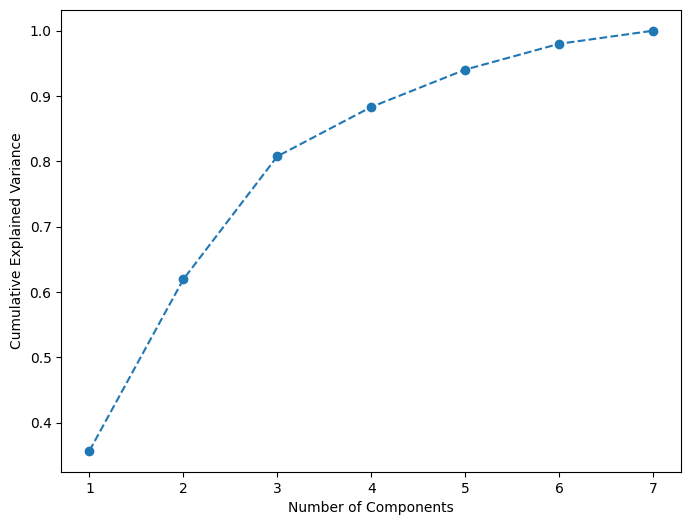

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### PCA with 3 components

In [8]:
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(customers_std)

### K-means with 4 clusters

In [9]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_transformed)

df_pca = pd.DataFrame(pca_transformed, columns=['component 1', 'component 2', 'component 3'])

df_customers_segmented = pd.concat([df_customers.reset_index(drop=True), df_pca], axis=1)
df_customers_segmented['Segment PCA'] = kmeans_pca.labels_

df_customers_segmented.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size,component 1,component 2,component 3,Segment PCA
0,67,2,124670,1,1,0,2,2.514746,0.834122,2.174806,3
1,22,1,150773,1,0,1,2,0.344935,0.598146,-2.211603,2
2,49,1,89210,0,1,0,0,-0.651063,-0.680093,2.280419,1
3,45,1,171565,1,1,0,1,1.714316,-0.579927,0.730731,0
4,53,1,149031,1,1,0,1,1.626745,-0.440496,1.244909,0


### Population per segment

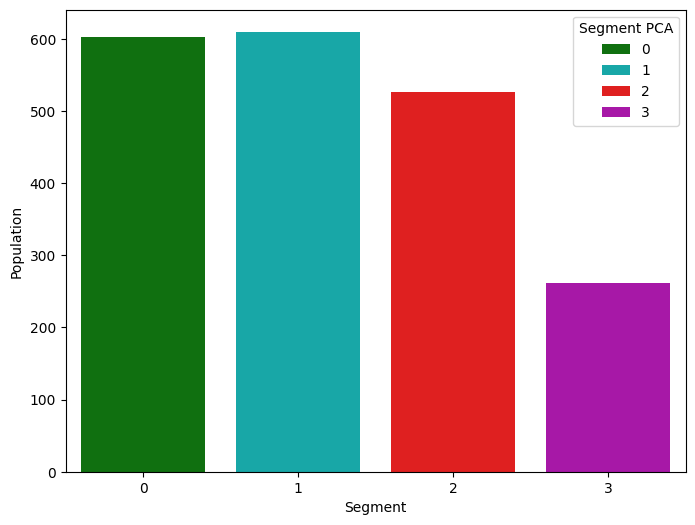

In [10]:
plt.figure(figsize=(8, 6))
s = sns.countplot(
    data=df_customers_segmented,
    x='Segment PCA',
    hue='Segment PCA',
    palette=['g', 'c', 'r', 'm']
)
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

In [11]:
df_customers_analysis = df_customers_segmented.groupby('Segment PCA').mean().round(2)
df_customers_analysis.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size,component 1,component 2,component 3
Segment PCA,,,,,,,,,,
0,36.67,0.68,138482.19,1.20,1.00,0.04,1.26,1.23,-1.22,0.04
1,33.47,0.94,88824.15,0.08,0.37,0.45,0.01,-1.61,-0.11,0.63
2,27.89,1.01,119503.42,1.06,0.24,0.97,0.81,-0.40,0.52,-1.20
3,55.92,2.13,158400.88,1.13,0.51,0.68,1.10,1.71,2.02,0.87


### Segment name assigning

In [12]:
segment_names = {
    0: 'Uprising',
    1: 'Career oriented',
    2: 'Fewer opportunities',
    3: 'Wealthy'
}
df_customers_segmented['Segment PCA'] = df_customers_segmented['Segment PCA'].map(segment_names)
df_customers_segmented.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size,component 1,component 2,component 3,Segment PCA
0,67,2,124670,1,1,0,2,2.514746,0.834122,2.174806,Wealthy
1,22,1,150773,1,0,1,2,0.344935,0.598146,-2.211603,Fewer opportunities
2,49,1,89210,0,1,0,0,-0.651063,-0.680093,2.280419,Career oriented
3,45,1,171565,1,1,0,1,1.714316,-0.579927,0.730731,Uprising
4,53,1,149031,1,1,0,1,1.626745,-0.440496,1.244909,Uprising


### Component 1 vs Component 2 of segmented customers

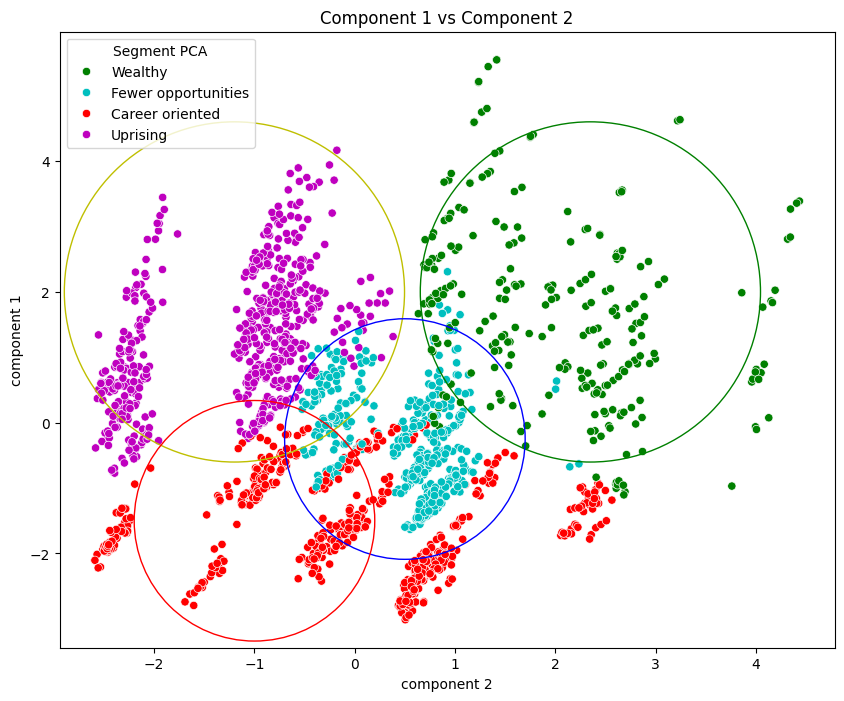

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_customers_segmented,
    x='component 2',
    y='component 1',
    hue='Segment PCA',
    palette=['g', 'c', 'r', 'm']
)
plt.scatter(2.35, 2,    s=60000, facecolors='none', edgecolors='g')
plt.scatter(-1.2, 2,    s=60000, facecolors='none', edgecolors='y')
plt.scatter(0.5, -0.25, s=30000, facecolors='none', edgecolors='b')
plt.scatter(-1, -1.5,   s=30000, facecolors='none', edgecolors='r')

plt.title('Component 1 vs Component 2')
plt.show()